In [ ]:
import matplotlib.pyplot as plt
import random
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,Flatten,Dense
import seaborn as sns
from tensorflow.keras.models import save_model
from tensorflow.math import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
directory = 'data'
categories = ['withMask','withoutMask']

In [ ]:
Image_size = 100
data = []
for category in categories:
    label = categories.index(category)
    folder = os.path.join(directory,category)
    for img_name in os.listdir(folder):
        image_path = os.path.join(folder,img_name)
        image = cv2.imread(image_path)
        if image is not None:
            resized_image = cv2.resize(image,(Image_size,Image_size))
            data.append([resized_image,label])

In [ ]:
twoindices = []
has = False
nothave = False
index = 0
for feature, label in data:
    if has == False and label == 0:
        twoindices.append(index)
        has = True
    elif nothave == False and label == 1:
        twoindices.append(index)
        nothave = True
    if has == True and nothave == True:
        break
    index += 1

masked


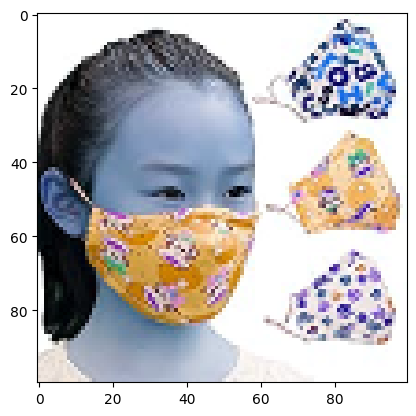

not masked


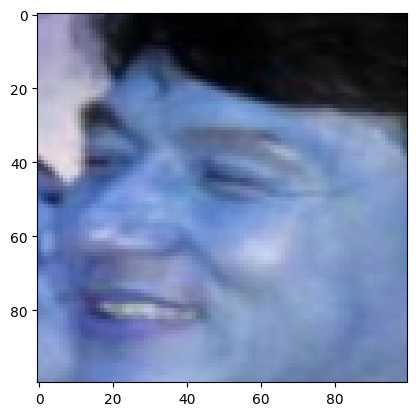

In [ ]:
for index in twoindices:
    print('not masked' if data[index][1] == 1 else 'masked')
    plt.imshow(data[index][0])
    plt.show()

In [ ]:
random.shuffle(data)

In [ ]:
X = []
Y = []
for feature, label in data:
    X.append(feature)
    Y.append(label)

In [ ]:
print(f'X:{len(X)}, Y:{len(Y)}')

X:7553, Y:7553


In [ ]:
Y = np.array(Y)
X = np.array(X)
print(X.shape)
print(Y.shape)

(7553, 100, 100, 3)
(7553,)


In [ ]:
# Scaling images values
X = X/255

not masked


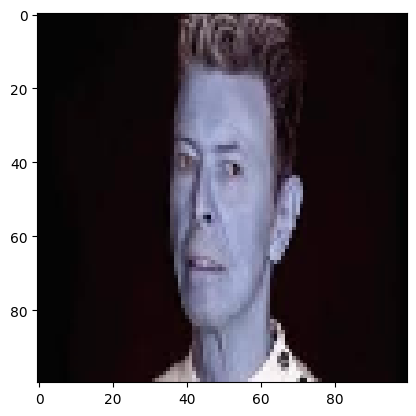

not masked


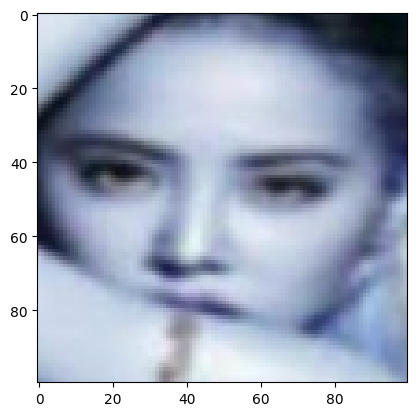

not masked


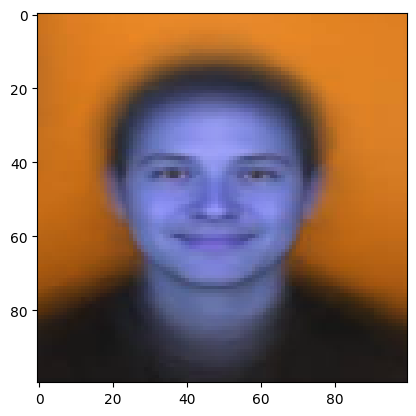

masked


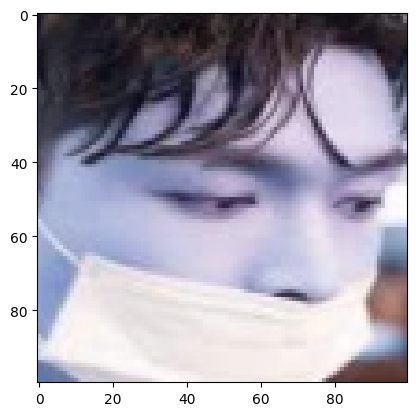

not masked


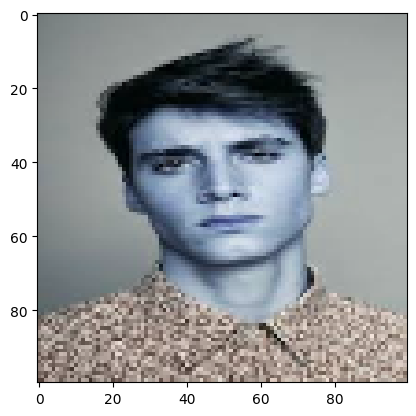

In [ ]:
for i in range(5):
    print('masked' if Y[i] == 0 else 'not masked')
    plt.imshow(X[i])
    plt.show()

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.95,random_state=2)
print(X.shape,x_train.shape,x_test.shape)
print(Y.shape,y_train.shape,y_test.shape)

(7553, 100, 100, 3) (7175, 100, 100, 3) (378, 100, 100, 3)
(7553,) (7175,) (378,)


In [ ]:
Input_size = (Image_size,Image_size,3)
Num_classes = 2

Model = Sequential([
    Input(shape=Input_size),
    Conv2D(32,kernel_size=(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64,kernel_size=(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),

    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(Num_classes,activation='softmax')
])

In [ ]:
Model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
result = Model.fit(x_train,y_train,validation_split=0.1,epochs=7)

Epoch 1/7
202/202 ━━━━━━━━━━━━━━━━━━━━ 107s 519ms/step - accuracy: 0.7709 - loss: 0.4973 - val_accuracy: 0.8928 - val_loss: 0.2636
Epoch 2/7
202/202 ━━━━━━━━━━━━━━━━━━━━ 104s 515ms/step - accuracy: 0.9144 - loss: 0.2216 - val_accuracy: 0.8844 - val_loss: 0.3250
Epoch 3/7
202/202 ━━━━━━━━━━━━━━━━━━━━ 142s 517ms/step - accuracy: 0.9390 - loss: 0.1611 - val_accuracy: 0.9220 - val_loss: 0.2108
Epoch 4/7
202/202 ━━━━━━━━━━━━━━━━━━━━ 139s 505ms/step - accuracy: 0.9624 - loss: 0.1026 - val_accuracy: 0.9164 - val_loss: 0.2605
Epoch 5/7
202/202 ━━━━━━━━━━━━━━━━━━━━ 116s 575ms/step - accuracy: 0.9746 - loss: 0.0675 - val_accuracy: 0.9178 - val_loss: 0.2424
Epoch 6/7
202/202 ━━━━━━━━━━━━━━━━━━━━ 137s 550ms/step - accuracy: 0.9832 - loss: 0.0468 - val_accuracy: 0.9290 - val_loss: 0.2268
Epoch 7/7
202/202 ━━━━━━━━━━━━━━━━━━━━ 143s 555ms/step - accuracy: 0.9894 - loss: 0.0353 - val_accuracy: 0.9290 - val_loss: 0.2829


In [ ]:
evaluation = Model.evaluate(x_test,y_test)
print("the loss value is: ",evaluation[0])
print("the accuracy value is: ",evaluation[1])

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - accuracy: 0.9394 - loss: 0.2168
the loss value is:  0.233865424990654
the accuracy value is:  0.9338624477386475


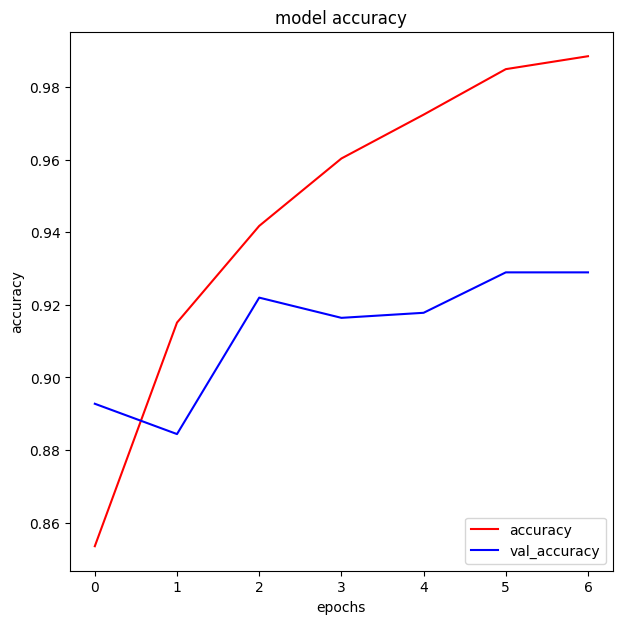

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(result.history['accuracy'],color='red')
plt.plot(result.history['val_accuracy'],color='blue')
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['accuracy','val_accuracy'],loc='lower right')

In [ ]:
predicted_y = Model.predict(x_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 239ms/step


In [ ]:
y_predicted_values = []
for value in predicted_y:
    y_predicted_values.append(np.argmax(value))
comparison = []
for predicted_value,true_value in zip(y_predicted_values,y_test):
    comparison.append([predicted_value,true_value])
print(comparison)

[[0, 0], [1, 1], [0, 0], [0, 0], [0, 0], [0, 0], [1, 1], [1, 1], [0, 0], [0, 0], [1, 1], [0, 0], [0, 0], [1, 1], [1, 1], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [1, 1], [1, 1], [0, 0], [0, 0], [1, 1], [1, 1], [1, 1], [0, 0], [0, 0], [1, 1], [1, 1], [0, 0], [0, 1], [1, 1], [1, 1], [1, 1], [0, 0], [0, 0], [1, 1], [0, 0], [0, 0], [0, 0], [1, 1], [0, 0], [1, 1], [1, 1], [0, 0], [1, 1], [1, 0], [0, 1], [0, 0], [1, 1], [0, 0], [1, 1], [1, 1], [1, 1], [0, 0], [0, 0], [0, 0], [1, 1], [0, 0], [0, 0], [0, 0], [0, 0], [1, 1], [1, 1], [0, 0], [1, 1], [0, 0], [1, 1], [1, 0], [0, 0], [0, 0], [1, 1], [1, 1], [1, 1], [0, 0], [1, 1], [1, 0], [1, 1], [0, 0], [1, 0], [1, 1], [0, 0], [0, 0], [1, 1], [1, 1], [1, 1], [1, 0], [1, 1], [0, 0], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [0, 0], [0, 0], [1, 1], [0, 0], [0, 0], [1, 1], [0, 0], [1, 1], [0, 0], [0, 0], [1, 1], [0, 0], [1, 0], [1, 1], [0, 0], [1, 1], [0, 0], [0, 0], [1, 1], [1, 1], [1, 1], [0, 0], [0, 0], [1, 1], [1, 1], [1, 1], [1, 1], [0, 0], [1, 1],

In [ ]:
print(len(comparison))

378


<Axes: >

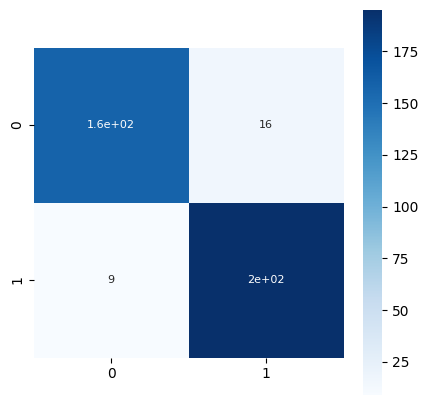

In [ ]:
plt.figure(figsize=(5,5))
conf_matrix = confusion_matrix(y_test,y_predicted_values)
sns.heatmap(conf_matrix,square=True,cbar=True,annot=True,annot_kws={'size':8},cmap='Blues')

In [ ]:
def detect_mask(image_path):
    image = cv2.imread(image_path)
    if image.shape[-1] == 1:
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    resized_image = cv2.resize(image,(Image_size,Image_size))
    resized_image = resized_image / 255
    prediction = Model.predict(np.expand_dims(resized_image, axis=0))
    print(prediction)
    predicted_class = ['Masked','Not Masked'][np.argmax(prediction)]
    print(predicted_class)

In [ ]:
detect_mask('hima_with.jpeg')
detect_mask('hima_without.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[9.9995470e-01 4.5249744e-05]]
Masked
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[0.02186495 0.978135  ]]
Not Masked


In [ ]:
# Import necessary libraries (if not already done)
import cv2
import numpy as np

# Load the face detection cascade and start capturing video from the webcam
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture(0)  # 0 is the default camera index; change if needed

while True:
    # Read the current frame from the camera
    ret, frame = cap.read()

    if not ret:
        print("Failed to grab frame")
        break

    # Convert the frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    # For each detected face, predict whether the person is wearing a mask
    for (x, y, w, h) in faces:
        face = frame[y:y+h, x:x+w]  # Extract the face from the frame
        resized_face = cv2.resize(face, (Image_size, Image_size))  # Resize to fit the model input
        resized_face = resized_face / 255.0  # Normalize the image

        # Make the prediction using the model
        prediction = Model.predict(np.expand_dims(resized_face, axis=0))
        label = 'Masked' if np.argmax(prediction) == 0 else 'Not Masked'

        # Display the label on the video feed
        color = (0, 255, 0) if label == 'Masked' else (0, 0, 255)  # Green for Masked, Red for Not Masked
        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)
        cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)

    # Show the frame with the detection and label
    cv2.imshow('Mask Detection', frame)

    # Exit the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


Failed to grab frame


In [ ]:
import cv2
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame")
        break

    cv2.imshow("Test Camera", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Failed to grab frame
